## PART I: Draw a plot chart to see if there is a trend.


A stationary time series is one whose properties do not depend on the time at which the series is observed.Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. On the other hand, a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time.

In [1]:
### Seasonal ARIMA (SARIMA) Model Analysis ### 
#MDividends.csv has monthly dividends of a stock over 50 years. 
#PART I: Draw a plot chart to see if there is a trend. If there is, then performing differencing to detrend the data.

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#Import data
dividends=pd.read_csv("C:/Users/shubh/OneDrive/MyCloud/GIT/Time-Series-Analysis/SARIMA_Basics/MDividends.csv",sep=",",parse_dates=True,index_col=0)

#Take a look at what's inside of the data
dividends

#Transform dataframe into a time series
dividends.index = pd.DatetimeIndex(dividends.index).to_period('M')
dividends


,MDividends
Date,
1969-01,0.46
1969-02,0.43
1969-03,0.66
1969-04,0.80
1969-05,0.75
...,...
2018-08,0.23
2018-09,1.01
2018-10,0.35


<AxesSubplot:xlabel='Date'>

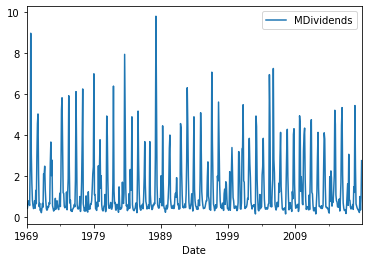

In [2]:
#Draw plot chart
dividends.plot()

<AxesSubplot:xlabel='Date'>

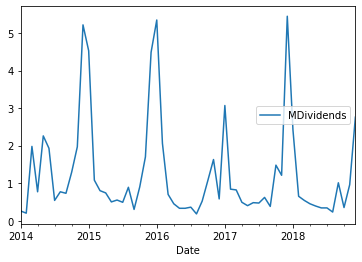

In [4]:
#Use the last 5 year data to show seasonality more clearly
last5years=dividends.loc[dividends.index>="2014-01"]
last5years.plot()

#Clearly, a 12-month seasonality exists in data. 
#Also, different seasonalities are not stationary. Differencing in seasons is neccessary.

In [5]:
#No trend. So, no differencing for non-seasonal model.Therefore, k_diff is set to zero. 
#But needs seasonal differencing, because some monthly dividends are clearly more than other months.
#Thus, k_seasonal_diff=True, seasonal_periods=12 since there is a cycle every 12 months.

from statsmodels.tsa.statespace.tools import diff 
diffdvds=diff(dividends, k_diff=0, k_seasonal_diff=True, seasonal_periods=12)
diffdvds

,MDividends
Date,
1970-01,-0.04
1970-02,0.06
1970-03,0.14
1970-04,-0.36
1970-05,0.56
...,...
2018-08,-0.39
2018-09,0.63
2018-10,-1.13


<AxesSubplot:xlabel='Date'>

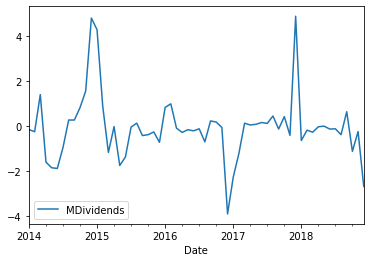

In [8]:
last5years_diffdvds=diffdvds.loc[diffdvds.index>="2014"]
last5years_diffdvds.plot() #now de-trend data or stationary data

## Part II: Draw ACF and PACF Plot Charts to identify the SARIMA Model

C:\Users\shubh\miniconda3\envs\timeseries\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


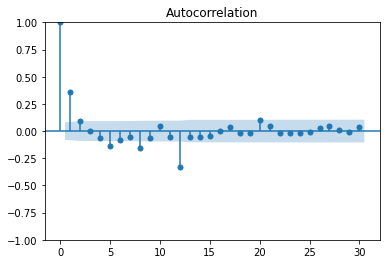

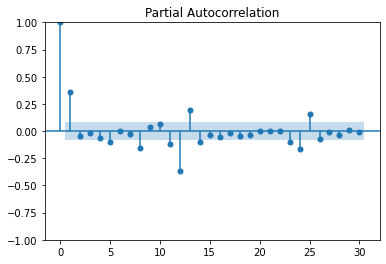

In [9]:
#Part II: Draw ACF and PACF Plot Charts to identify the SARIMA Model
sm.graphics.tsa.plot_acf(diffdvds.values.squeeze(), lags=30) # You can change the lags value if you want to see more lags
sm.graphics.tsa.plot_pacf(diffdvds.values.squeeze(), lags=30)
plt.show()

In [10]:
#Oservations
#=============For Non seasonal Model ===========
#ACF => 2 significant before diminishings, so rejected MA model
#PACF => 1 significant before diminishings, which is lower than ACF significant number, So selected AR Model

#=============For seasonal Model ===========
#From ACF also we can see season at 12 months
#ACF => 1 significant,  selected MA model
#PACF =>  rejected AR Model


## Part III Run analysis model

In [11]:
#Part III Run analysis model
#According to the ACF and PACF chart above, we identify AR(1) for non-seasonal model. 
#We identify MA(1) for the seasonal model. From ACF, we again confirm that there's a cycle every 12 months.

mod = sm.tsa.SARIMAX(dividends, order=(1,0,0),seasonal_order=(0,1,1,12))
res = mod.fit()
print(res.summary())
#As you can see in the result, p-value for the coefficient of ar.L1 and ma.S.L12 are both significant. 
#The Lung-Box test is not significant, meaning that the population error is zero. So, ARIMA(1,0,0)X(0,1,1)12 is a good model.
#We choose dividends instead of diffdvd as the source data, because we want the SARIMAX do the differencing for us.
#If you use diffdvd as the source data, then seasonal_order=(0,0,1,12). Notice that D=0 if using diffdvd as the source data.


                                      SARIMAX Results                                       
Dep. Variable:                           MDividends   No. Observations:                  600
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -990.718
Date:                              Sun, 10 Jul 2022   AIC                           1987.437
Time:                                      14:20:22   BIC                           2000.567
Sample:                                  01-31-1969   HQIC                          1992.553
                                       - 12-31-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4740      0.032     14.837      0.000       0.411       0.537
ma.S.L12      -0.62

## Part IV: Forecasting

In [12]:
#Part IV: Forecasting

#If forecast one day ahead
print(res.forecast(1))

#If forecast two days ahead
print(res.forecast(2))

2019-01    2.583158
Freq: M, dtype: float64
2019-01    2.583158
2019-02    0.753872
Freq: M, Name: predicted_mean, dtype: float64
